In [ ]:
%load_ext autoreload
%autoreload 2
from pentropy_main import *
import itertools
import json
import matplotlib.pyplot as plt
import copy
import random
import numpy as np
import time
from collections import defaultdict, Counter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


优化后的对称性化简办法 迭代版

In [ ]:
# define parameters
N = 6
K = 4
point_num = 12 # 采样点密度
generate_size = 30
subset_size = 30
comb_size = 30
user_perm = list(itertools.permutations(range(1, K + 1)))
file_perm = list(itertools.permutations(range(1, N + 1)))
start_time = time.time()

In [ ]:
# generate all random variables, stores in single_vars

single_vars = []
vars = []
Wrvs = []
necessary_vars = []
W_combinations = []
for i in range(1, N+1):
    single_vars.append("W" + str(i))
    Wrvs.append("W" + str(i))
for i in range(1, K+1):
    single_vars.append("Z" + str(i))

X_combinations = ["X" + item for item in Iutils.generate_combinations(N, K)]
if N == 3 and K == 3:
    X_combinations = ["X112","X113","X123"]
elif N == 2 and K == 4:
    X_combinations = ["X1112","X1122"]
elif N == 4 and K == 2:
    X_combinations = ["X12","X13","X14"]
elif N == 4 and K == 3:
    X_combinations = ["X112","X113","X114","X123"]
elif N == 4 and K == 4:
    X_combinations = ["X1112","X1123","X1234"]
elif N == 4 and K == 5:
    X_combinations = ["X11112","X11123","X11234"]
elif N == 5 and K == 4:
    X_combinations = ["X1112","X1123","X1234"]
elif N == 6 and K == 4:
    X_combinations = ["X1112","X1123","X1234"]
elif N == 5 and K == 5:
    X_combinations = ["X11112","X11123","X11234","X12345"]

Xrvs_cons = Iutils.symmetry_vars(user_perm,file_perm,X_combinations)

for item in X_combinations:
    single_vars.append(item)
for var in single_vars:
    # vars.append([var])
    necessary_vars.append([var])
vars.append(Wrvs)
necessary_vars.append(Wrvs)
for r in range(N+1):
    # 生成指定长度的所有组合
    combos = itertools.combinations(Wrvs, r+1)
    for combo in combos:
        W_combinations.append(list(combo))
Wrvs_cons = Iutils.symmetry_vars(user_perm,file_perm,W_combinations)
print(Wrvs_cons)
print(single_vars)
Wkey = ','.join(sorted(Wrvs, key=Iutils.sort_key))
print(Wkey)
print(Xrvs_cons)

['W1', 'W1,W2', 'W1,W2,W3', 'W1,W2,W3,W4', 'W1,W2,W3,W4,W5', 'W1,W2,W3,W4,W5,W6']
['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'Z1', 'Z2', 'Z3', 'Z4', 'X1112', 'X1123', 'X1234']
W1,W2,W3,W4,W5,W6
['X1112', 'X1123', 'X1234']


In [ ]:
vars = [] # 变量集合，元素为列表，一个列表对应一个联合熵，列表元素为字符串
entropydict = EntropyEqDict()
index = 0
episode = 0

necessary_vars = []
for var in single_vars:
    vars.append([var])
    necessary_vars.append([var])
# necessary_vars = Iutils.symmetry_vars(N,K,vars)
necessary_vars.append(Wrvs)

print(necessary_vars)
vars.append(Wrvs)

sets = Iutils.generate_random_subsets(single_vars,subset_size,2,episode+4)
# print(sets)
vars += sets
print(vars)

[['W1'], ['W2'], ['W3'], ['W4'], ['W5'], ['W6'], ['Z1'], ['Z2'], ['Z3'], ['Z4'], ['X1112'], ['X1123'], ['X1234'], ['W1', 'W2', 'W3', 'W4', 'W5', 'W6']]
[['W1'], ['W2'], ['W3'], ['W4'], ['W5'], ['W6'], ['Z1'], ['Z2'], ['Z3'], ['Z4'], ['X1112'], ['X1123'], ['X1234'], ['W1', 'W2', 'W3', 'W4', 'W5', 'W6'], ['W1', 'W4', 'Z2'], ['W6', 'Z4', 'X1123', 'X1234'], ['W4', 'Z3', 'Z4'], ['X1123', 'X1234'], ['W3', 'W6'], ['W6', 'Z4'], ['W5', 'Z3', 'X1234'], ['W4', 'X1112'], ['W2', 'W4', 'W6', 'Z2'], ['W6', 'Z4', 'X1112'], ['W4', 'Z3', 'X1234'], ['W6', 'Z3', 'Z4'], ['W5', 'Z2'], ['W5', 'Z1', 'Z3', 'X1234'], ['W2', 'Z4'], ['W4', 'W5', 'Z1', 'Z2'], ['W1', 'W3', 'Z2', 'Z3'], ['Z3', 'X1112'], ['W2', 'W5'], ['Z1', 'Z2', 'Z3', 'Z4'], ['W1', 'Z4', 'X1234'], ['Z3', 'Z4', 'X1112'], ['W6', 'Z2', 'X1112', 'X1123'], ['W4', 'Z4'], ['W6', 'Z1'], ['W3', 'W4', 'Z2', 'X1234'], ['W2', 'W3'], ['W6', 'Z3', 'Z4', 'X1234'], ['W2', 'W5', 'Z2'], ['W2', 'X1112']]


In [ ]:
expand_vars = vars[:]

combs,combinations = Iutils.generate_combs(single_vars,comb_size)
Iutils.preprocessing_combs(vars,single_vars,expand_vars,combs)    

entropydict = EntropyEqDict()
entropydict_all = EntropyEqDict()

print(len(expand_vars))
print(expand_vars)
Iutils.symmetrize_by_dict_simple(N,K,expand_vars,entropydict_all)
# Iutils.symmetrize_by_dict(user_perm,file_perm,expand_vars,entropydict,entropydict_all)
print(len(entropydict.redict))

Iutils.problem_constraints_process(N,K,Wkey,entropydict_all)
entropydict_all.regenerate_keys()

for var in expand_vars:
    var_str = ",".join(sorted(var,key=Iutils.sort_key))
    entropydict[var_str] = entropydict_all.get(var_str)
entropydict.regenerate_keys()

print(len(entropydict.redict))
print(entropydict.redict)

comb size 30
1105
[['W1'], ['W2'], ['W3'], ['W4'], ['W5'], ['W6'], ['Z1'], ['Z2'], ['Z3'], ['Z4'], ['X1112'], ['X1123'], ['X1234'], ['W1', 'W2', 'W3', 'W4', 'W5', 'W6'], ['W1', 'W4', 'Z2'], ['W6', 'Z4', 'X1123', 'X1234'], ['W4', 'Z3', 'Z4'], ['X1123', 'X1234'], ['W3', 'W6'], ['W6', 'Z4'], ['W5', 'Z3', 'X1234'], ['W4', 'X1112'], ['W2', 'W4', 'W6', 'Z2'], ['W6', 'Z4', 'X1112'], ['W4', 'Z3', 'X1234'], ['W6', 'Z3', 'Z4'], ['W5', 'Z2'], ['W5', 'Z1', 'Z3', 'X1234'], ['W2', 'Z4'], ['W4', 'W5', 'Z1', 'Z2'], ['W1', 'W3', 'Z2', 'Z3'], ['Z3', 'X1112'], ['W2', 'W5'], ['Z1', 'Z2', 'Z3', 'Z4'], ['W1', 'Z4', 'X1234'], ['Z3', 'Z4', 'X1112'], ['W6', 'Z2', 'X1112', 'X1123'], ['W4', 'Z4'], ['W6', 'Z1'], ['W3', 'W4', 'Z2', 'X1234'], ['W2', 'W3'], ['W6', 'Z3', 'Z4', 'X1234'], ['W2', 'W5', 'Z2'], ['W2', 'X1112'], ['W1', 'W2'], ['W1', 'Z2'], ['W1', 'W2', 'Z2'], ['W1', 'W6'], ['W1', 'X1234'], ['W1', 'W6', 'X1234'], ['W1', 'Z3'], ['W1', 'Z3', 'X1234'], ['W1', 'W4'], ['W1', 'Z4'], ['W1', 'W4', 'Z4'], ['W1', 'Z1

In [ ]:
# generate inequalities
regions = Region.empty()
Iutils.generate_inequalities_combs(vars,entropydict,regions,combinations)

[[W2, Z2, ['W1']],
 [W2, Z2],
 [W2, Z2, ['Z1']],
 [W2, Z2, ['X1112']],
 [W2, Z2, ['X1123']],
 [W2, Z2, ['X1234']],
 [W2, Z2, ['W1', 'W2', 'W3', 'W4', 'W5', 'W6']],
 [W2, Z2, ['W1', 'W4', 'Z2']],
 [W2, Z2, ['W6', 'Z4', 'X1123', 'X1234']],
 [W2, Z2, ['W4', 'Z3', 'Z4']],
 [W2, Z2, ['X1123', 'X1234']],
 [W2, Z2, ['W6', 'Z4']],
 [W2, Z2, ['W5', 'Z3', 'X1234']],
 [W2, Z2, ['W4', 'X1112']],
 [W2, Z2, ['W4', 'Z3', 'X1234']],
 [W2, Z2, ['W5', 'Z1', 'Z3', 'X1234']],
 [W2, Z2, ['W4', 'W5', 'Z1', 'Z2']],
 [W2, Z2, ['Z3', 'X1112']],
 [W2, Z2, ['Z1', 'Z2', 'Z3', 'Z4']],
 [W2, Z2, ['W6', 'Z2', 'X1112', 'X1123']],
 [W2, Z2, ['W3', 'W4', 'Z2', 'X1234']],
 [W6, X1234, ['W1']],
 [W6, X1234, ['W5']],
 [W6, X1234],
 [W6, X1234, ['Z1']],
 [W6, X1234, ['X1112']],
 [W6, X1234, ['X1123']],
 [W6, X1234, ['W1', 'W2', 'W3', 'W4', 'W5', 'W6']],
 [W6, X1234, ['W1', 'W4', 'Z2']],
 [W6, X1234, ['W6', 'Z4', 'X1123', 'X1234']],
 [W6, X1234, ['W4', 'Z3', 'Z4']],
 [W6, X1234, ['W5', 'Z3', 'X1234']],
 [W6, X1234, ['W4', '

In [ ]:
print(len(regions.exprs))
for expr in regions.exprs:
    expr.sort_terms()
    print(expr)

501
H({W1,W2}) + H({W1,Z1}) - H({W1}) - H({W1,W2,Z1}) >= 0
H({W1}) + H({Z1}) - H({W1,Z1}) >= 0
H({W1,Z1}) + H({Z1,Z2}) - H({Z1}) - H({W1,Z1,Z2}) >= 0
H({W2,X1112}) + H({Z1,X1112}) - H({X1112}) - H({W2,Z1,X1112}) >= 0
H({W2,X1123}) + H({Z1,X1123}) - H({X1123}) - H({W2,Z1,X1123}) >= 0
H({W1,X1234}) - H({X1234}) >= 0
H({W1,W2,W3,W4,W5,Z2}) - H({W1,W2,W3,W4,W5}) >= 0
H({W1,W2,W3}) + H({W1,W2,Z1}) - H({W1,W2}) - H({W1,W2,W3,Z1}) >= 0
H({W2,W6,Z4,X1123,X1234}) - H({W5,Z4,X1123,X1234}) >= 0
H({W1,W2,Z1,Z4}) + H({W1,Z1,Z2,Z3}) - H({W1,Z1,Z2}) - H({W1,W3,Z1,Z2,Z3}) >= 0
H({W2,X1123,X1234}) - H({X1123,X1234}) >= 0
H({W1,W2,Z1}) + H({W1,Z1,Z2}) - H({W1,Z1}) - H({W1,W2,Z1,Z4}) >= 0
H({W1,W5,Z3,X1234}) - H({W5,Z1,X1234}) >= 0
H({W2,W3,X1112}) + H({W3,Z1,X1112}) - H({W3,X1112}) - H({W2,W3,Z1,X1112}) >= 0
H({W1,W2,Z4,X1234}) - H({W1,Z2,X1234}) >= 0
H({W1,W5,Z2,Z3,X1234}) - H({W5,Z1,Z2,X1234}) >= 0
H({W1,W2,W3,Z1}) + H({W1,W2,Z1,Z4}) - H({W1,W2,Z1}) - H({W1,W2,W3,Z2,Z3}) >= 0
H({W2,Z1,X1112}) + H({Z1,

In [ ]:
# construct the constranits matrix
ine_constraints = []
print(len(entropydict.redict))
ent_num = len(entropydict.redict) + 3 # 所有熵变量+M+R+value
for expr in regions.exprs:
    row = [0] * ent_num
    for term in expr.terms:
        # print(entropydict[term.to_ent_str()])
        row[entropydict[term.to_ent_str()]] = term.coef
    row[-1] = expr.value
    ine_constraints.append(row)

289


In [ ]:
# problem constraints
# R >= H(X)
print(Xrvs_cons)
print(Wrvs_cons)
prob_cons_num = 0
for key in Xrvs_cons:
    if entropydict.get(key) != None:
        row3 = [0] * ent_num
        row3[entropydict[key]] = -1
        row3[-2] = 1
        ine_constraints.append(row3)
        prob_cons_num += 1

# M >= H(Z)
row5 = [0] * ent_num
row5[entropydict["Z1"]] = -1
row5[-3] = 1
ine_constraints.append(row5)
prob_cons_num += 1

# H(W1,..,Wn) >= n
for key in Wrvs_cons:
    if entropydict.get(key) != None:
        rvs = key.split(",")
        row3 = [0] * ent_num
        row3[entropydict[key]] = 1
        row3[-1] = len(rvs)
        # print(row3)
        ine_constraints.append(row3)
        prob_cons_num += 1

# M = M_value
row5 = [0] * ent_num
ine_constraints.append(row5)

['X1112', 'X1123', 'X1234']
['W1', 'W1,W2', 'W1,W2,W3', 'W1,W2,W3,W4', 'W1,W2,W3,W4,W5', 'W1,W2,W3,W4,W5,W6']


In [ ]:
ine_constraints = np.array(ine_constraints)
print(ine_constraints.shape)
ine_constraints = ine_constraints.astype(np.float64)
expr_num = ine_constraints.shape[0] - 1 # 不等式数量
ent_num = ine_constraints.shape[1] - 1 # 减之前用于生成矩阵，减之后就是实际的熵变量数量

ori_obj_coef = np.zeros(ent_num)
ori_obj_coef[-1] = 1
print(ent_num)

(512, 292)
291


In [ ]:
# original problem solver
from gurobipy import Model, GRB, LinExpr, GurobiError
import gurobipy as gp

def gurobi_solver():
    try:
        global effective_idx_gurobi
        global ori_obj_coef
        ine_list = []
        # global result_slope
        # 创建 Gurobi 模型
        model = Model("entropy_minimization")

        # 禁用输出日志（可选）
        model.setParam("OutputFlag", 0)

        # 创建变量
        variables = []
        for i in range(ent_num):
            var = model.addVar(name=f"V{i}", lb=0)
            variables.append(var)
        obj_expr = gp.quicksum(ori_obj_coef * variables)
        model.setObjective(obj_expr, GRB.MINIMIZE)
        # model.setObjective(variables[-1], GRB.MINIMIZE)
        # var_names = ["V" + str(i) for i in range(ent_num)]
        # variables = model.addVars(var_names, lb=0, obj=[0.0] * (ent_num), name="V")
        # variables[var_names[-1]].obj = 1.0  # 设置目标函数的系数
        # model.setObjective(variables[var_names[-1]], GRB.MINIMIZE)

        # 添加不等式约束
        for ine in ine_constraints[:-1]:
            model.addConstr(LinExpr(ine[:-1], variables) >= ine[-1])

        # 添加等式约束 M = M_value
        M_cons = ine_constraints[-1]
        model.addConstr(LinExpr(M_cons[:-1], variables) == M_cons[-1])
        # 添加等式约束 M = M_value
        # model.addConstr(variables[var_names[-2]] == M_value)

        model.optimize()

        # 检查求解状态
        if model.status == GRB.OPTIMAL:
            dual_values = model.getAttr('Pi', model.getConstrs())

            indices = [i for i, val in enumerate(dual_values) if abs(val) > 1e-5 and i < len(regions.exprs)]
            # slope = dual_values[-1]
            # result_slope.append(slope)

            for index in indices:
                if index not in effective_idx_gurobi:
                    effective_idx_gurobi.append(index)
                    effective_idx_gurobi.sort()
            
            # 获取目标函数值
            optimal_value = model.objVal
            print(f"Optimal value: {optimal_value}")
        
            return optimal_value
        elif model.status == GRB.INFEASIBLE:
            print("Model is infeasible. Trying to find the IIS...")
            model.computeIIS()
            model.write("model.ilp")
            print("IIS written to model.ilp. Check this file for conflicting constraints.")
            for c in model.getConstrs():
                if c.IISConstr:
                    print(f"约束 {c.constrName} 导致不可行")
                    ine_list.append(c.constrName)
            for v in model.getVars():
                if v.IISLB or v.IISUB:
                    print(f"变量 {v.varName} 的边界条件导致不可行")
            return ine_list
        else:
            print(f"Model status: {model.status}")
            return None
    except GurobiError as e:
        print(f"Gurobi Error: {e}")
        return None


In [ ]:
def dual_solver():
    try:
        global expr_num
        global dual_obj_coef
        global trans_ine_cons
        effective_idx_dual = []
        # 创建 Gurobi 模型
        model = Model("secondary LP")

        # 启用输出日志
        model.setParam("OutputFlag", 0)

        # 创建变量
        variables = []
        for i in range(expr_num):
            var = model.addVar(name=f"Y{i}", lb=0)
            variables.append(var)
        var_z = model.addVar(name="Z",lb=-GRB.INFINITY, ub=GRB.INFINITY)
        variables.append(var_z)
        # print("expr_num",expr_num)
        # print("len_var",len(variables))
        # objective_expr = gp.quicksum(coef_dual[i] * variables[i] for i in range(expr_num)) + M_value * variables[-1]
        objective_expr = gp.quicksum(dual_obj_coef * variables)
        # objective_expr = gp.quicksum(variables)
        model.setObjective(objective_expr, GRB.MAXIMIZE)

        # 添加不等式约束
        for ine in trans_ine_cons:
            model.addConstr(LinExpr(ine[:-1], variables) == ine[-1])

        # 添加等式约束 M = M_value
        # model.addConstr(variables[-1] == M_value)

        model.optimize()

        # 检查求解状态
        if model.status == GRB.OPTIMAL:
            # 获取目标函数值
            optimal_value = model.objVal
            # print(f"Optimal value: {optimal_value}")

            # 获取变量的最优解
            solution_values = {var.varName: var.x for var in model.getVars()}
            # print(f"Solution: {solution_values}")

            for var_name, var_value in solution_values.items():
                if var_value > 0:
                    index = int(var_name[1:])
                    if index < expr_num - prob_cons_num and index is not None:
                        effective_idx_dual.append(index)
            return solution_values, effective_idx_dual
        elif model.status == GRB.INFEASIBLE:
            print("Model is infeasible. Trying to find the IIS...")
            model.computeIIS()
            model.write("model.ilp")
            print("IIS written to model.ilp. Check this file for conflicting constraints.")
            return None,None
        else:
            print(f"Model status: {model.status}")
            return None,None
    except GurobiError as e:
        print(f"Gurobi Error: {e}")
        return None,None

In [ ]:
def find_min_effective_indices(dual_value):
    non_zero_counts = np.count_nonzero(dual_value, axis=1)
    old_slope = 0
    single_cut_idx = []
    all_cut_idx = set()
    old_slope = dual_value[0][-1]
    min_row = 0
    min_cnt = non_zero_counts[0]
    for idx,row in enumerate(dual_value):
        if row[-1] != old_slope:
            for i,value in enumerate(dual_value[min_row]):
                if value > 0 and i < len(regions.exprs):
                    single_cut_idx.append(i)
            # print(f"slope:{old_slope},index{single_cut_idx}")
            all_cut_idx = all_cut_idx.union(set(single_cut_idx))
            old_slope = row[-1]
            min_cnt = non_zero_counts[idx]
            min_row = idx
            single_cut_idx = []
            continue
        if non_zero_counts[idx] < min_cnt:
            min_cnt = non_zero_counts[idx]
            min_row = idx
    for i,value in enumerate(dual_value[min_row]):
        if value > 0 and i < len(regions.exprs):
            single_cut_idx.append(i)
    all_cut_idx = all_cut_idx.union(set(single_cut_idx))
    # print(f"slope:{old_slope},index{single_cut_idx}")
    # print("all",all_cut_idx)
    return sorted(list(all_cut_idx))

In [ ]:
# solve problem
plot_data = []
effective_idx_gurobi = []
all_eff_indx = set()
result_slope = []
ori_slope = []
M_space = np.linspace(0,N,point_num*N+1)
dual_value = []
effective_idx_cut = []
# print(M_space)
for M_value in M_space:
    # 根据M_value更新约束矩阵，添加等式约束
    ine_constraints = list(ine_constraints[:-1])
    row = [0] * (ent_num + 1)
    row[-3] = 1
    row[-1] = M_value
    ine_constraints.append(row)
    ine_constraints = np.array(ine_constraints)
    
    # print("ine_constraints")
    # print(ine_constraints)
    # print("ori_obj_coef",ori_obj_coef)

    # # 更新对偶问题约束矩阵
    expr_num = ine_constraints.shape[0] - 1
    trans_ine_cons = ine_constraints.T[:-1] # 对偶问题的约束矩阵 是原约束矩阵的转置
    dual_obj_coef = ine_constraints[:,-1] # 原约束的常量 是对偶问题目标函数的系数
    trans_ine_cons = np.hstack((trans_ine_cons, ori_obj_coef.T.reshape(-1, 1))) # 原目标函数的系数，是对偶问题约束的常量
    # print("shape",trans_ine_cons.shape)
    # print("trans_ine_cons")
    # print(trans_ine_cons)
    # print("dual_obj_coef",dual_obj_coef)

    # 求解原LP问题
    result = gurobi_solver()
    if type(result) == list:
        bad = Region.empty()
        for ine in result:
            idx = int(ine[1:])
            print(f"type:{type(idx)},value:{idx}")
            terms = []
            row = ine_constraints[idx]
            for i in range(len(row) - 1):
                coef = row[i]
                if coef != 0:
                    if entropydict.get_keys_by_value(i) != None:
                        term_x = entropydict.get_keys_by_value(i)[0]
                        var_str = term_x.split(",")
                        if var_str not in vars:
                            vars.append(var_str) # 添加有效不等式中的变量
                        term_x = Comp.jes(term_x)
                        term = Term(x=[term_x.copy()],coef=int(coef),termtype=TermType.H)
                        terms.append(term) 
            expr = Expr(terms, eqtype="ge", value=row[-1])
            expr.sort_terms()
            # print("expr",expr)
            bad.append_expr(expr)
        for expr in bad.exprs:
            print(expr)
   
    # 求解对偶LP问题
    if result != 0:
        solution_values, effective_idx_dual = dual_solver()
        if solution_values is not None:
            dual_value.append(list(solution_values.values()))

        # print("effective_indices",effective_idx_dual)
        if effective_idx_dual is not None:
            all_eff_indx = all_eff_indx.union(set(effective_idx_dual))
        effective_idx_dual = sorted(list(all_eff_indx))
    
    plot_data.append((M_value, result))
if len(dual_value) > 0:
    effective_idx_cut = find_min_effective_indices(dual_value)
    # print("dual")
    # print(dual_value)
    print(f"dual:{len(effective_idx_dual)}")
    print(effective_idx_dual)
    print(f"gurobi:{len(effective_idx_gurobi)}")
    print(effective_idx_gurobi)
    print(f"cut:{len(effective_idx_cut)}")
    print(effective_idx_cut)

Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal valu

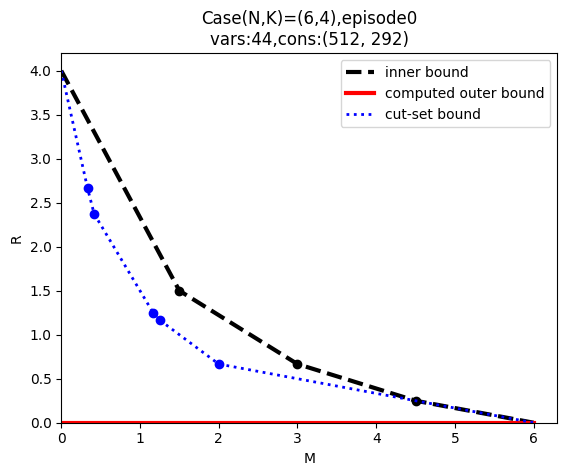

from start to now:  23.21491050720215 s


In [ ]:
# plot

Iutils.plot_inner_bound(N,K)
# plot the calculation result
x = [item[0] for item in plot_data]
y = [item[1] for item in plot_data]
result_slope = Iutils.compute_slopes(x,y)
point_x = []
point_y = []
for i in range(1,len(result_slope)):
    if result_slope[i-1] != result_slope[i]:
        point_x.append(x[i])
        point_y.append(y[i])
plt.scatter(point_x,point_y,color='red')

for xi, yi in zip(point_x, point_y):
    label = f"({round(xi,3)}, {round(yi,3)})"
    plt.annotate(label,  
                (xi, yi),  
                textcoords="offset points",  
                xytext=(30, 5),  
                ha='center') 
plt.plot(x, y, color='red', linewidth=3, label='computed outer bound')
Iutils.plot_cutset_bound(N,K,point_num)

plt.xlim(left=0)
plt.ylim(bottom=0)
plt.xlabel("M")
plt.ylabel("R")
plt.legend()
plt.title(f"Case(N,K)=({N},{K}),episode0\nvars:{len(vars)},cons:{ine_constraints.shape}")
plt.show()
print("from start to now: ",time.time()-start_time,"s")

comb size 30
get:598,time:0
not get:622,time:3.9035010999923543
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optimal value: 0.0
Optim

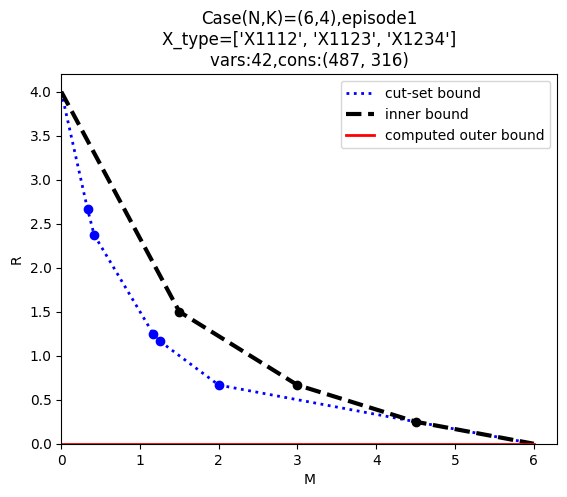

from start to now:  35.670172691345215 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.3333333333

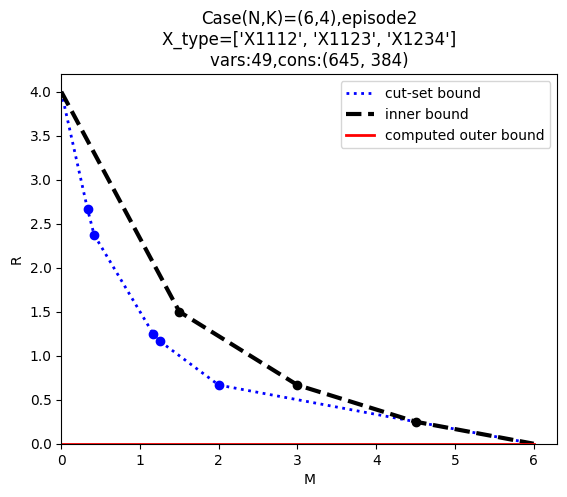

from start to now:  53.013571977615356 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.3333333333

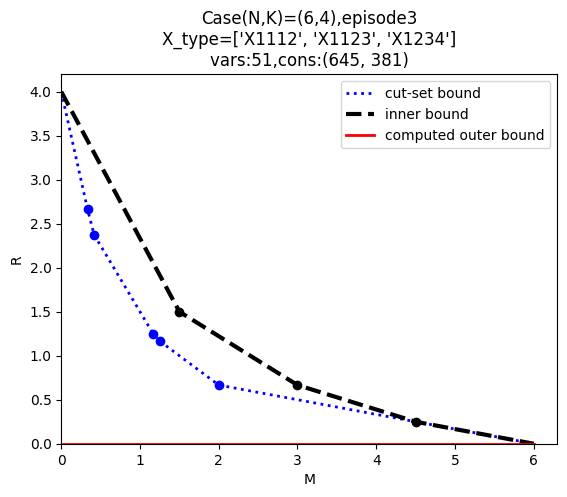

from start to now:  71.14237976074219 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.33333333333

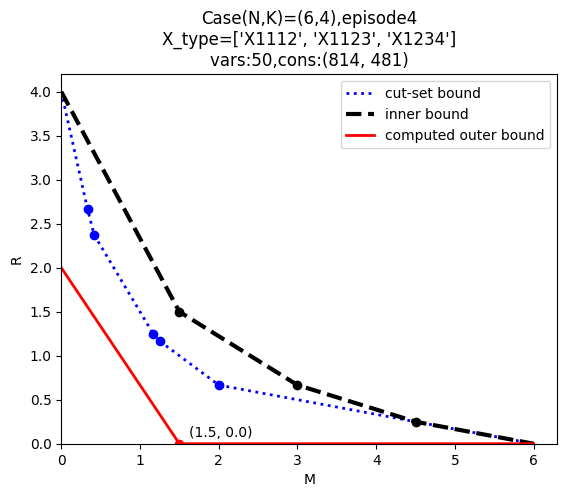

from start to now:  100.07177519798279 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.3333333333

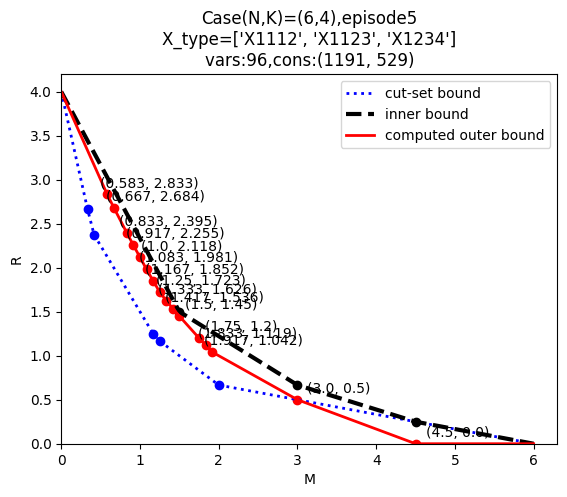

from start to now:  158.42587757110596 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.3333333333

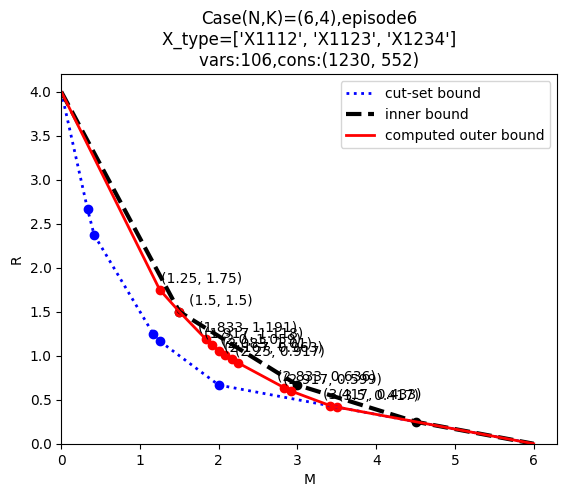

from start to now:  223.2752776145935 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.33333333333

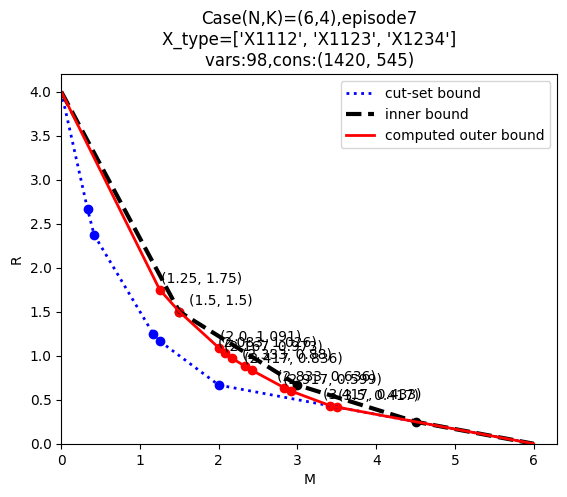

from start to now:  290.5431139469147 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.33333333333

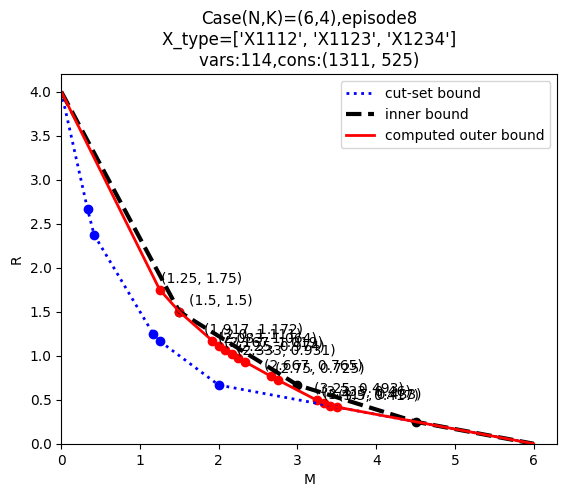

from start to now:  354.35047602653503 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.3333333333

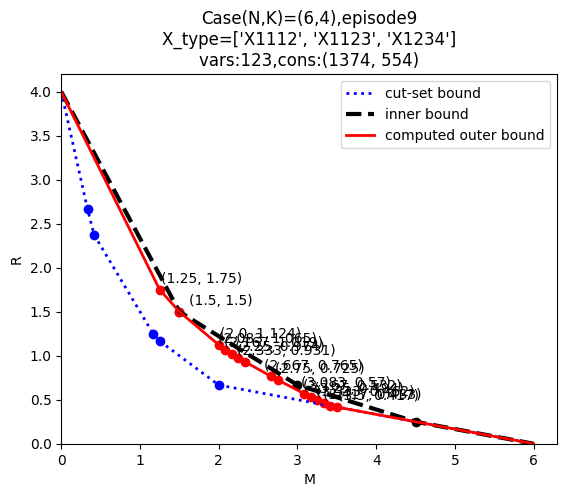

from start to now:  416.7768385410309 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.33333333333

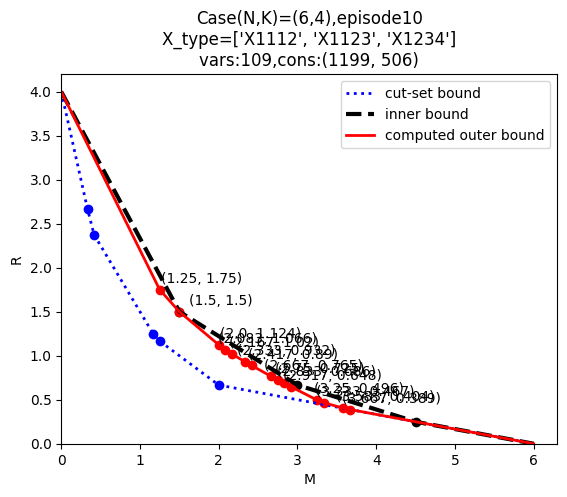

from start to now:  469.7648096084595 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.33333333333

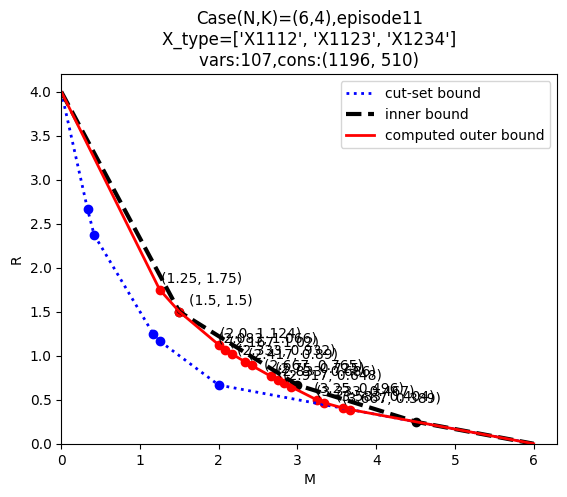

from start to now:  522.4310872554779 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.33333333333

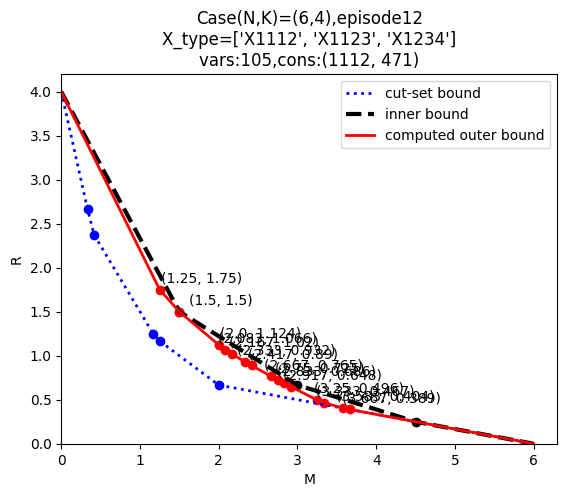

from start to now:  570.1329004764557 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.33333333333

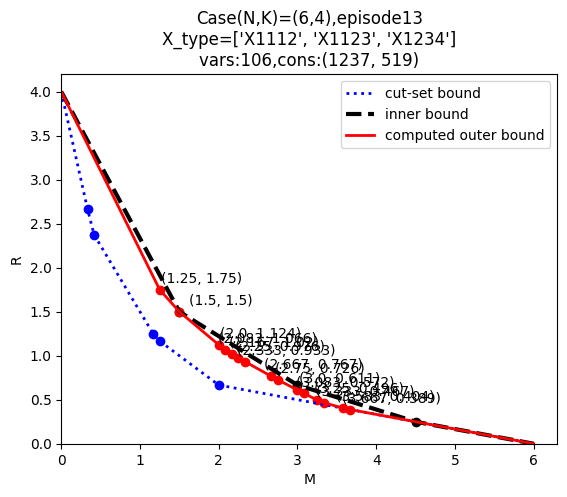

from start to now:  624.4439244270325 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.33333333333

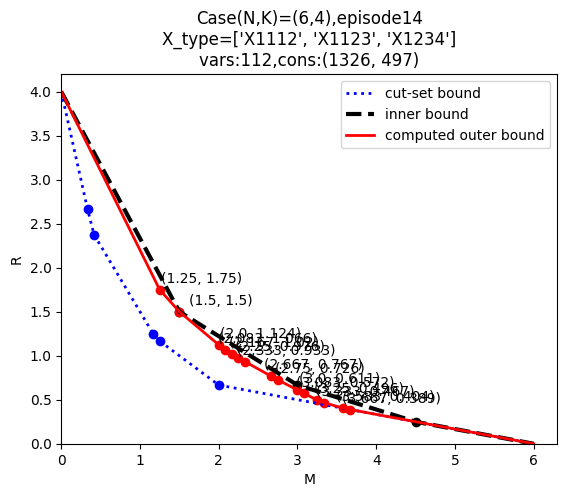

from start to now:  680.1902930736542 s
[0.0, 0.08333333333333333, 0.16666666666666666, 0.25, 0.3333333333333333, 0.41666666666666663, 0.5, 0.5833333333333333, 0.6666666666666666, 0.75, 0.8333333333333333, 0.9166666666666666, 1.0, 1.0833333333333333, 1.1666666666666665, 1.25, 1.3333333333333333, 1.4166666666666665, 1.5, 1.5833333333333333, 1.6666666666666665, 1.75, 1.8333333333333333, 1.9166666666666665, 2.0, 2.083333333333333, 2.1666666666666665, 2.25, 2.333333333333333, 2.4166666666666665, 2.5, 2.583333333333333, 2.6666666666666665, 2.75, 2.833333333333333, 2.9166666666666665, 3.0, 3.083333333333333, 3.1666666666666665, 3.25, 3.333333333333333, 3.4166666666666665, 3.5, 3.583333333333333, 3.6666666666666665, 3.75, 3.833333333333333, 3.9166666666666665, 4.0, 4.083333333333333, 4.166666666666666, 4.25, 4.333333333333333, 4.416666666666666, 4.5, 4.583333333333333, 4.666666666666666, 4.75, 4.833333333333333, 4.916666666666666, 5.0, 5.083333333333333, 5.166666666666666, 5.25, 5.33333333333

KeyboardInterrupt: 

In [ ]:
episode = 0
oriall_vars = [] # 存放所有已经生成过的变量
same_times = 0
a = 3
effctive_vars_last = []
while episode < 500:
    episode += 1
    # print("episode",episode)
    # print(ori_slope)
    # print(result_slope)
    if ori_slope ==  result_slope:
        same_times += 1
    else:
        same_times = 0
    if same_times == a:
        break
    # print("oriall vars",len(oriall_vars))
    # print("same times",same_times)
    # print(entropydict_all.eqdict)
    # 更新regions、vars
    # print("1.更新regions、vars")
    # print("number of effective exprs:",len(effective_idx_cut))
    # print(effective_indices)
    effective_constraints = [ine_constraints[i] for i in effective_idx_cut]
    regions = Region.empty() # 更新regions
    ori_vars = vars[:]
    oriall_vars += vars[:]
    # entropydict_all = entropydict.copy()
    vars = []
    effective_vars = []
    effective_idx_cut = []
    add_vars = set()
    del_vars = set()
    index = 0
    count_dict = {}
    # regions = cutset_regions.copy()
    # print("dict",regions.exprdict)
    for row in effective_constraints:
        terms = []
        term_list = []
        for i in range(len(row) - 1):
            coef = row[i]
            if coef != 0:
                if entropydict.get_keys_by_value(i) != None:
                    term_x = entropydict.get_keys_by_value(i)[0]
                    var_str = term_x.split(",")
                    if term_x in count_dict:
                        count_dict[term_x] += 1
                    else:
                        count_dict[term_x] = 1
                    if var_str not in vars:
                        vars.append(var_str) # 添加有效不等式中的变量
                    term_list.append(coef)
                    term_list.append(term_x)
                    term_x = Comp.jes(term_x)
                    term = Term(x=[term_x.copy()],coef=int(coef),termtype=TermType.H)
                    terms.append(term)
        # print(term_list)
        # x_vars, y_vars, z_vars = extract_single_var_conditional(term_list)
        # print(f"x_vars:{x_vars}, y_vars:{y_vars}, z_vars:{z_vars}")
        expr = Expr(terms, eqtype="ge", value=row[-1])
        expr.sort_terms()
        # print("expr",expr)
        regions.append_expr(expr)
    for expr in regions.exprs:
        pass
        # print(expr)
        
       
    effective_vars = vars[:]
    add_vars = set(map(tuple, effective_vars)) - set(map(tuple, effctive_vars_last))
    del_vars = set(map(tuple, effctive_vars_last)) - set(map(tuple, effective_vars))
    effctive_vars_last = vars[:]
    
    # print(f"add vars:{add_vars}")
    # print(f"del vars:{del_vars}")

    # print("effective vars",vars)
    # print("len of effecitve vars",len(vars))
    count_dict = sorted(count_dict.items(), key=lambda item: item[1],reverse=True)
    count_dict = dict(count_dict)
    # print(count_dict)

    # 生成新vars
    # print("2.生成新vars")
    # 方式1：effective vars的子集
    # generate_vars = Iutils.generate_random_subsets(effective_vars,generate_size,2,episode+3)
    
    # 方式2：ori vars的交并集
    generate_vars = []
    for i in range(len(ori_vars)):
        for j in range(i + 1, len(ori_vars)):
            union = list(set(ori_vars[i]) | set(ori_vars[j]))
            if len(union) <= episode+1:
                # print("lenunion",len(union))
                union.sort()
                generate_vars.append(union)
            ins = list(set(ori_vars[i]) & set(ori_vars[j]))
            if ins:
                ins.sort()
                generate_vars.append(ins)

    # 方式3：effctive vars的交并集
    # generate_vars = []
    # for i in range(len(effective_vars)):
    #     for j in range(i + 1, len(effective_vars)):
    #         union = list(set(effective_vars[i]) | set(effective_vars[j]))
    #         if len(union) <= episode+1:
    #             # print("lenunion",len(union))
    #             union.sort()
    #             generate_vars.append(union)
    #         ins = list(set(effective_vars[i]) & set(effective_vars[j]))
    #         if ins:
    #             ins.sort()
    #             generate_vars.append(ins)
    
    if generate_size > len(generate_vars):
        generate_size = len(generate_vars)
    random_indices = np.random.choice(len(generate_vars), size=generate_size, replace=False)
    selected_vars = [generate_vars[i] for i in random_indices]
    # selected_vars = generate_vars[:]

    for var in selected_vars:
        if var not in vars:
            vars.append(var)
    # print(len(vars))
    # for var in single_vars:
    #     if [var] not in vars:
    #         vars.append([var])
    # print(len(vars))


    # 随机引入子集
    result_subsets = Iutils.generate_random_subsets(single_vars, subset_size, 2, episode+4)
    for subset in result_subsets:
        if subset not in vars and subset not in oriall_vars:
            vars.append(subset)

    # 显示vars构成
    # print("ori vars",len(ori_vars))
    # print(ori_vars)
    # print("generate vars",len(generate_vars))
    # print(generate_vars)
    # print("selected vars",len(selected_vars))
    # print(selected_vars)
    # print("random vars",len(result_subsets))
    # print(result_subsets)
    # print("number of varibles:",len(vars))

    # 对vars进行封闭集和对称性处理，生成entropydict
    # print("3.对vars进行封闭集和对称性处理，生成entropydict")
    expand_vars = vars[:]
    combs,combinations = Iutils.generate_combs(single_vars,comb_size)
    Iutils.preprocessing_combs(vars,single_vars,expand_vars,combs)
    for var in necessary_vars:
        if var not in expand_vars:
            expand_vars.append(var)
    # print("before symmetrize num of expanded vars:",len(expand_vars))
    entropydict = EntropyEqDict()
    # Xrvs_cons = []
    # Wrvs_cons = []
    # print("all_before_eqdict",len(entropydict_all.eqdict))
    # print("all_before_redict",len(entropydict_all.redict))
    # Iutils.symmetrize_by_dict(user_perm,file_perm,expand_vars,entropydict,entropydict_all)
    Iutils.symmetrize_by_dict_simple(N,K,expand_vars,entropydict_all)

    
    
    # Iutils.symmetrize_simple(N,K,expand_vars,entropydict)
    # print("after symmetreize num of expanded vars:",len(entropydict.redict))
    # print("all_after_eq",len(entropydict_all.eqdict))
    # print("all_after_re",len(entropydict_all.redict))
    # Iutils.symmetrize(user_perm,file_perm,expand_vars,entropydict,Xrvs_cons,Wrvs_cons)
    # print(entropydict)

    # 问题约束
    # print("4.问题约束")
    Iutils.problem_constraints_process(N,K,Wkey,entropydict_all)
    entropydict_all.regenerate_keys()
    for var in expand_vars:
        var_str = ",".join(sorted(var,key=Iutils.sort_key))
        entropydict[var_str] = entropydict_all.get(var_str)
    entropydict.regenerate_keys()
    # print(entropydict.redict)
    # print("entropydictall",len(entropydict_all.redict))
    # print("number of problem variebles",len(entropydict.redict))
    # print("number of all the variebles",len(entropydict.eqdict))

    # 生成不等式集，并合并相同不等式
    # print("5.生成不等式集，并合并相同不等式")
    Iutils.generate_inequalities_combs(vars,entropydict,regions,combinations)
    # print("before reducing",len(regions.exprs))
    regions.reduce_redundant_expr()
    # print("number of exprs",len(regions.exprs))


    # 生成不等式矩阵
    # print("6.生成不等式矩阵")
    ine_constraints = []
    ent_num = len(entropydict.redict) + 3
    for expr in regions.exprs:
        row = [0] * ent_num
        for term in expr.terms:
            row[entropydict[term.to_ent_str()]] = term.coef
        row[-1] = expr.value
        non_zero_values = [i for i in row if i != 0]
        non_zero_count = len(non_zero_values)
        if non_zero_count == 0:
            pass
            # print("0 row")
            # print(expr)
        elif sum(row[:-1]) < 0:
            pass
            # print("negative row")
            # print(expr)
        else:
            ine_constraints.append(row)
    # additional constraints
    # R >= H(X)
    prob_cons_num = 0
    for key in Xrvs_cons:
        if entropydict.get(key) != None:
            row3 = [0] * ent_num
            row3[entropydict[key]] = -1
            row3[-2] = 1
            ine_constraints.append(row3)
            prob_cons_num += 1

    # M >= H(Z)
    row5 = [0] * ent_num
    row5[entropydict["Z1"]] = -1
    row5[-3] = 1
    ine_constraints.append(row5)
    prob_cons_num += 1

    # H(W1,..,Wn) >= n
    for key in Wrvs_cons:
        if entropydict.get(key) != None:
            rvs = key.split(",")
            row3 = [0] * ent_num
            row3[entropydict[key]] = 1
            row3[-1] = len(rvs)
            ine_constraints.append(row3)
            prob_cons_num += 1

    # M = M_value
    row5 = [0] * ent_num
    ine_constraints.append(row5)
    
    ent_num -= 1 # 实际变量数量
    

    # 问题求解
    plot_data = []
    effective_idx_gurobi = []
    all_eff_indx = set()
    result_slope = []
    ori_slope = []
    M_space = np.linspace(0,N,point_num*N+1)
    dual_value = []
    # print(M_space)
    t_solve = 0
    # print("shape of ine_constraints",ine_constraints.shape)
    for M_value in M_space:
        s = time.perf_counter()
        # 根据M_value更新约束矩阵，添加等式约束
        ine_constraints = list(ine_constraints[:-1])
        row = [0] * (ent_num + 1)
        row[-3] = 1
        row[-1] = M_value
        ine_constraints.append(row)

        ine_constraints = np.array(ine_constraints)
        if M_value == 0:
            pass
            # print("shape of ine_constraints",ine_constraints.shape)
        ine_constraints = ine_constraints.astype(np.float64)

        ori_obj_coef = np.zeros(ent_num)
        ori_obj_coef[-1] = 1
        # print("ine_constraints")
        # print(ine_constraints)
        # print("ori_obj_coef",ori_obj_coef)

        # # 更新对偶问题约束矩阵
        expr_num = ine_constraints.shape[0] - 1
        trans_ine_cons = ine_constraints.T[:-1] # 对偶问题的约束矩阵 是原约束矩阵的转置
        dual_obj_coef = ine_constraints[:,-1] # 原约束的常量 是对偶问题目标函数的系数
        trans_ine_cons = np.hstack((trans_ine_cons, ori_obj_coef.T.reshape(-1, 1))) # 原目标函数的系数，是对偶问题约束的常量
        # print("shape",trans_ine_cons.shape)
        # print(trans_ine_cons)
        # print("dual_obj_coef",dual_obj_coef)

        # 求解原LP问题
        result = gurobi_solver()
        if type(result) == list:
            bad = Region.empty()
            for ine in result:
                idx = int(ine[1:])
                # print(f"type:{type(idx)},value:{idx}")
                terms = []
                row = ine_constraints[idx]
                for i in range(len(row) - 1):
                    coef = row[i]
                    if coef != 0:
                        if entropydict.get_keys_by_value(i) != None:
                            term_x = entropydict.get_keys_by_value(i)[0]
                            var_str = term_x.split(",")
                            if term_x in count_dict:
                                count_dict[term_x] += 1
                            else:
                                count_dict[term_x] = 1
                            if var_str not in vars:
                                vars.append(var_str) # 添加有效不等式中的变量
                            term_x = Comp.jes(term_x)
                            term = Term(x=[term_x.copy()],coef=int(coef),termtype=TermType.H)
                            terms.append(term) 
                expr = Expr(terms, eqtype="ge", value=row[-1])
                expr.sort_terms()
                # print("expr",expr)
                bad.append_expr(expr)
            for expr in bad.exprs:
                pass
                # print(expr)

        elif result > 0:
            # 求解对偶LP问题
            solution_values, effective_idx_dual = dual_solver()
            if solution_values is not None:
                dual_value.append(list(solution_values.values()))

            # print("effective_indices",effective_idx_dual)
            if effective_idx_dual is not None:
                all_eff_indx = all_eff_indx.union(set(effective_idx_dual))
            effective_idx_dual = sorted(list(all_eff_indx))
        plot_data.append((M_value, result))
        e = time.perf_counter()
        t = e - s
        t_solve += t
    # print("solve time",t_solve)
    if len(dual_value) > 0:
        effective_idx_cut = find_min_effective_indices(dual_value)
        # print(f"dual:{len(effective_idx_dual)}")
        # print(effective_idx_dual)
        # print(f"gurobi:{len(effective_idx_gurobi)}")
        # print(effective_idx_gurobi)
        # print(f"cut:{len(effective_idx_cut)}")
        # print(effective_idx_cut)
    # 绘制图像

    # plot the cut-set bound
    Iutils.plot_cutset_bound(N,K,point_num)
    Iutils.plot_inner_bound(N,K)


    x = [item[0] for item in plot_data]
    y = [item[1] for item in plot_data]
    result_slope = Iutils.compute_slopes(x,y)
    point_x = []
    point_y = []
    for i in range(1,len(result_slope)):
        if result_slope[i-1] != result_slope[i]:
            point_x.append(x[i])
            point_y.append(y[i])
    plt.scatter(point_x,point_y,color="red")
    
    for xi, yi in zip(point_x, point_y):
        label = f"({round(xi,3)}, {round(yi,3)})"
        plt.annotate(label,  
                    (xi, yi),  
                    textcoords="offset points",  
                    xytext=(30, 5),  
                    ha='center')  
    plt.plot(x, y, color='red', linewidth=2, label='computed outer bound')

    
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.xlabel("M")
    plt.ylabel("R")
    plt.legend()
    plt.title(f"Case(N,K)=({N},{K}),episode{episode}\nX_type={X_combinations}\nvars:{len(vars)},cons:{ine_constraints.shape}")
    plt.show()
    print("from start to now: ",time.time()-start_time,"s")

    print(x)
    print(y)


In [ ]:
def find_min_effective_indices(dual_value):
    non_zero_counts = np.count_nonzero(dual_value, axis=1)
    single_cut_idx = []
    all_cut_idx = set()
    if len(dual_value) == 0:
        return []
    
    old_slope = round(dual_value[0][-1],3)
    min_row = 0
    min_cnt = non_zero_counts[0]
    cnt = 0
    for idx, row in enumerate(dual_value):
        # 当检测到斜率变化时处理前一个分段
        if round(row[-1],3) != old_slope:
            cnt += 1
            print(cnt)
            count_dict = {}
            current_slope = old_slope  # 保存前一分段的斜率
            # 收集前一分段的最小行非零索引
            single_cut_idx = []
            for i, value in enumerate(dual_value[min_row]):
                if value > 0 and i < len(regions.exprs):
                    single_cut_idx.append(i)
            
            print(f"分段斜率: {current_slope}\n有效索引: {len(single_cut_idx)},{single_cut_idx}")
            
            # 处理约束条件（保持原逻辑）
            effective_constraints = [ine_constraints[i] for i in single_cut_idx]
            for constraint in effective_constraints:
                terms = []
                for i in range(len(constraint) - 1):
                    coef = constraint[i]
                    if coef != 0:
                        term_x = entropydict.get_keys_by_value(i)
                        if term_x:
                            term_x = term_x[0]
                            count_dict[term_x] = count_dict.get(term_x, 0) + 1
                            term_x = Comp.jes(term_x)
                            terms.append(Term(x=[term_x.copy()], coef=int(coef), termtype=TermType.H))
                expr = Expr(terms, eqtype="ge", value=constraint[-1])
                expr.sort_terms()
                new_regions.append_expr(expr)
                print(expr)
            print(f"有效变量数量:{len(count_dict)}")
            count_dict = sorted(count_dict.items(), key=lambda item: item[1],reverse=True)
            count_dict = dict(count_dict)
            print(count_dict)
            if cnt == 1:
                count_dict_all = count_dict.copy()
                # print("all",count_dict_all)
            else:
                count_dict_all = Counter(count_dict_all)
                count_dict_all.update(count_dict)
                count_dict_all = dict(count_dict_all)
                # print("all",count_dict_all)
            all_cut_idx.update(single_cut_idx)
            
            # 初始化新分段
            old_slope = round(row[-1],3)     # 更新为当前行的新斜率
            min_cnt = non_zero_counts[idx]
            min_row = idx
            single_cut_idx = []
        
        # 更新当前分段的最小行
        else:
            if non_zero_counts[idx] < min_cnt:
                min_cnt = non_zero_counts[idx]
                min_row = idx

    # 处理最后一个分段
    single_cut_idx = []
    count_dict = {}
    for i, value in enumerate(dual_value[min_row]):
        if value > 0 and i < len(regions.exprs):
            single_cut_idx.append(i)
    cnt += 1
    print(cnt)
    print(f"分段斜率: {old_slope}\n有效索引: {len(single_cut_idx)},{single_cut_idx}")
    
    effective_constraints = [ine_constraints[i] for i in single_cut_idx]
    for constraint in effective_constraints:
        terms = []
        for i in range(len(constraint) - 1):
            coef = constraint[i]
            if coef != 0:
                term_x = entropydict.get_keys_by_value(i)
                if term_x:
                    term_x = term_x[0]
                    # var_str = term_x.split(",")
                    count_dict[term_x] = count_dict.get(term_x, 0) + 1
                    # if var_str not in vars:
                        # vars.append(var_str)
                    term_x = Comp.jes(term_x)
                    terms.append(Term(x=[term_x.copy()], coef=int(coef), termtype=TermType.H))
        expr = Expr(terms, eqtype="ge", value=constraint[-1])
        expr.sort_terms()
        new_regions.append_expr(expr)
        print(expr)

    print(f"有效变量数量:{len(count_dict)}")
    count_dict = sorted(count_dict.items(), key=lambda item: item[1],reverse=True)
    count_dict = dict(count_dict)
    print(count_dict) 
    
    count_dict_all = Counter(count_dict_all)
    count_dict_all.update(count_dict)
    count_dict_all = dict(count_dict_all)
    # print("all",count_dict_all)
    all_cut_idx.update(single_cut_idx)
    
    return count_dict_all,sorted(list(all_cut_idx))

In [ ]:
if len(dual_value) > 0:
    new_regions = Region.empty()
    # print("dual value")
    # for row in dual_value:
    #     print(row[-1])
    count_dict_all, effective_idx_cut = find_min_effective_indices(dual_value)
    print(f"dual:{len(effective_idx_dual)}")
    print(effective_idx_dual)
    print(f"gurobi:{len(effective_idx_gurobi)}")
    print(effective_idx_gurobi)
    print(f"cut:{len(effective_idx_cut)}")
    print(effective_idx_cut)